# Data exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn import random_projection
from sklearn.cluster import KMeans
import numpy as np

In [2]:
wna_data = pd.read_csv('../data/p2_fmt_wNA.csv',sep='\t')
wna_data.iloc[:,2:] = wna_data.iloc[:,2:].add(1).fillna(0) # 填补0并将所有值+1
wna_data

,#CHROM,POS,K10G,K12G,K13G,K16G,K21G,K23G,K25G,K28G,...,metaspades_90,metaspades_91,metaspades_92,metaspades_93,metaspades_94,metawrap_assemle_2487B,metawrap_assemle_2487C,metawrap_assemle_2487D,metawrap_assemle_2487E,read
0,EGOHCJCO_00001,174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0
1,EGOHCJCO_00001,184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0
2,EGOHCJCO_00003,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0
3,EGOHCJCO_00006,297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,EGOHCJCO_00006,342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124458,KMKHEIEB_02137,387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124459,KMKHEIEB_02144,443,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124460,KMKHEIEB_02144,471,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124461,KMKHEIEB_02144,473,0.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
region = pd.read_csv('../data/id_region.txt',sep='\t')
region.head()

,Id,region1,region2
0,K10G,KA,KA
1,K12G,KA,KA
2,K13G,KA,KA
3,K16G,KA,KA
4,K21G,KA,KA


<Axes: ylabel='Frequency'>

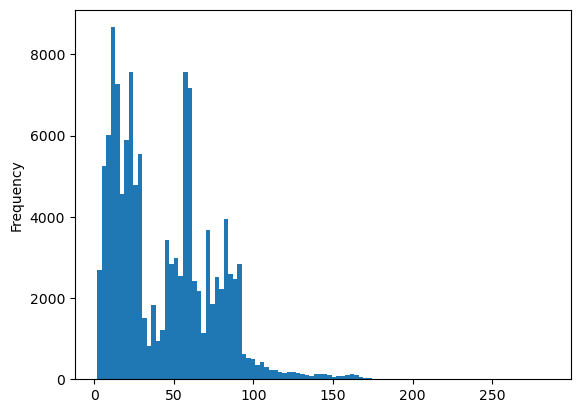

In [3]:
wna_data.iloc[:,2:].sum(axis=1).plot(kind='hist',bins=100)

(array([ 7., 15., 38., 23., 55., 57., 54., 45., 46., 41., 44., 29., 26.,
        10., 12.,  3.,  7.,  6., 22., 12., 32., 15., 41., 75., 23., 17.,
        20.,  4., 22., 16., 14., 13., 18., 18., 40.,  9., 21.,  6.,  2.,
         1.,  4.,  2.,  3.,  3.,  3.,  2.,  2.,  1.,  1.,  1.,  2.,  0.,
         0.,  1.,  2.,  1.,  3.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
         0.,  1.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
         22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
         45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
         67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
         90. ,  92.5,  95. ,  97.5, 100. , 102.5, 105. , 107.5, 110. ,
        112.5, 115. , 117.5, 120. , 122.5, 125. , 127.5, 130. , 132.5,
        

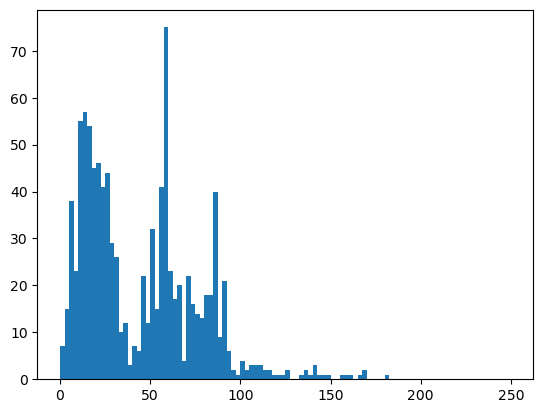

In [4]:
sampled_data = np.random.choice(wna_data.iloc[:,2:].sum(axis=1),1000,replace=False)
plt.hist(sampled_data,bins=100,range=(0,250))

In [130]:
import numpy as np
import scipy.stats as stats

# data = np.random.choice(wna_data.iloc[:,2:].sum(axis=1),1000,replace=False)
# data = wna_data.iloc[:,2:].sum(axis=1)
data = wna_data.iloc[:,2:]


# 记录原始数据和序号
original_data_with_index = list(enumerate(data.iloc[:,0]))

# 计算经验分布函数 (ECDF) 的值
data_sorted = np.sort(data)
cdf = np.arange(1, len(data) + 1) / len(data)

# 计算正态分布的值
normal_data = stats.norm.ppf(cdf)

# 建立映射关系
mapping_dict = {}
mapping_dict_idx = {}

for (idx, original_value), transformed_value in zip(original_data_with_index, normal_data):
    mapping_dict[(idx, original_value)] = transformed_value
    mapping_dict_idx[idx] = transformed_value

# 打印映射关系的部分数据
print("Mapping Dictionary:")
print({k: mapping_dict[k] for k in list(mapping_dict)[:10]})

Mapping Dictionary:
{(0, 0.0): -4.313499744566735, (1, 0.0): -4.15776195605302, (2, 0.0): -4.06415348342587, (3, 0.0): -3.9965359284656676, (4, 0.0): -3.943368178326786, (5, 0.0): -3.8994430888479874, (6, 0.0): -3.8619551313400096, (7, 0.0): -3.8292157695611646, (8, 0.0): -3.8001281277151793, (9, 0.0): -3.7739385992674377}


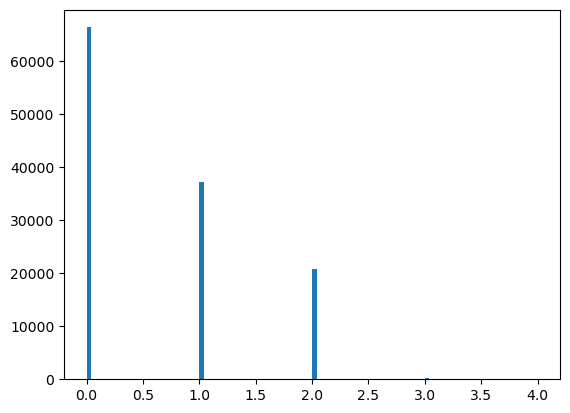

In [132]:
plt.hist(pd.DataFrame(original_data_with_index).iloc[:,1],bins=100)
plt.show()

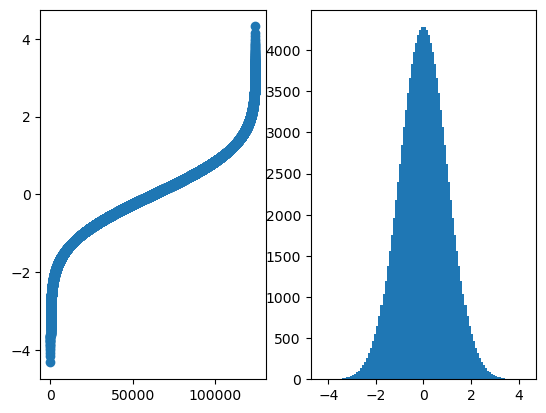

In [134]:
fig,ax = plt.subplots(1,2)
df = pd.DataFrame([mapping_dict_idx]).T.drop(index=len(data)-1)
ax[0].scatter(df.index.values,df.values)
ax[1].hist(df,bins=100)
plt.show()

array([[<Axes: title={'center': '0'}>]], dtype=object)

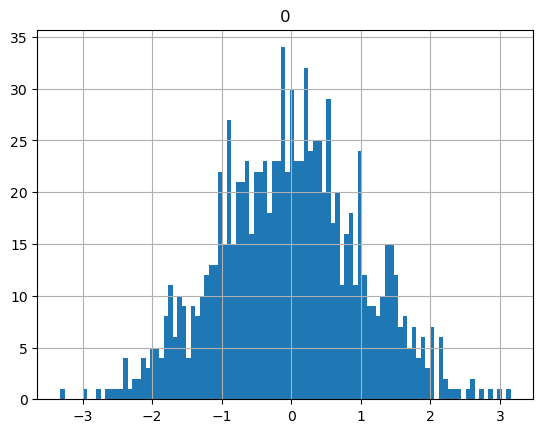

In [156]:
# ramdom sampling
sampled_data = df.sample(1000)
sampled_data.hist(bins=100)

<Axes: ylabel='Frequency'>

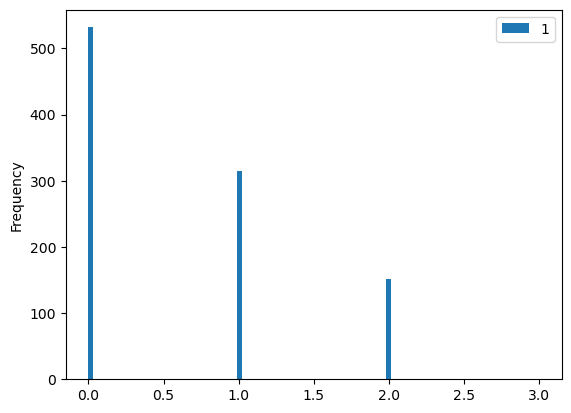

In [136]:
# sampled data in original set
pd.DataFrame(original_data_with_index).iloc[sampled_data.index,:].plot(kind='hist',x=0,y=1,bins=100)

In [151]:
data.iloc[sampled_data.index,:]

,K10G,K12G,K13G,K16G,K21G,K23G,K25G,K28G,K29G,K38G,...,metaspades_90,metaspades_91,metaspades_92,metaspades_93,metaspades_94,metawrap_assemle_2487B,metawrap_assemle_2487C,metawrap_assemle_2487D,metawrap_assemle_2487E,read
374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0
93271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34518,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
37461,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121667,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0
118153,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


cumulative variance explained: 62.02%


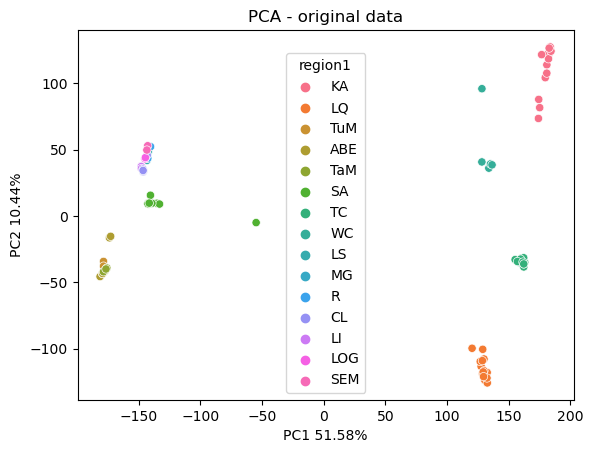

In [152]:
def conduct_pca(data, n_components=2):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data.T)

    cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
    print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

    pca_region = pd.concat([region,pd.DataFrame(pca_result,columns=['pc1','pc2'])],axis=1)
    sns.scatterplot(data=pca_region, x="pc1", y="pc2", hue="region1")
    plt.xlabel(f"PC1 {pca.explained_variance_ratio_[0]:.02%}")
    plt.ylabel(f"PC2 {pca.explained_variance_ratio_[1]:.02%}")
    return None

conduct_pca(data, n_components=2)
plt.title('PCA - original data')
plt.show()

cumulative variance explained: 62.41%


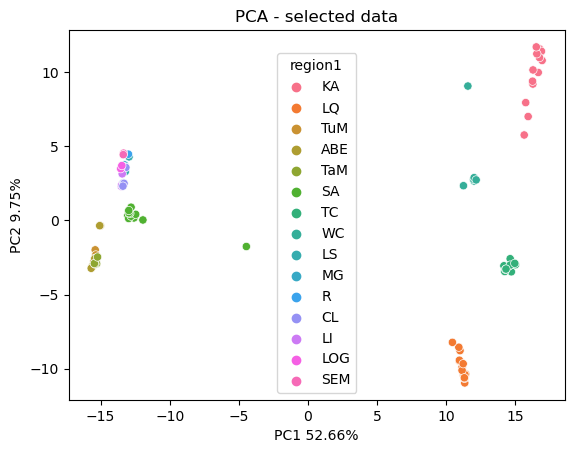

In [157]:
conduct_pca(data.iloc[sampled_data.index,:], n_components=2)
plt.title('PCA - selected data')
plt.show()

In [161]:
wna_data.iloc[sampled_data.index,:].to_csv('./p2_fmt_wNA_sampled.csv',sep='\t')

In [160]:
wna_data.iloc[sampled_data.index,:]

,#CHROM,POS,K10G,K12G,K13G,K16G,K21G,K23G,K25G,K28G,...,metaspades_90,metaspades_91,metaspades_92,metaspades_93,metaspades_94,metawrap_assemle_2487B,metawrap_assemle_2487C,metawrap_assemle_2487D,metawrap_assemle_2487E,read
75380,NKKLILLO_01852,710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94742,EIOICPMD_02751,140,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
83356,NJGEAONH_00665,802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17597,LBLMJKHD_00224,762,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27217,LBLMJKHD_00682,3357,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66862,KCEKCIHP_01053,124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2340,EGOHCJCO_00654,1149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0
90572,LHMFJDLO_00620,480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50579,LBLMJKHD_02233,472,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KDE

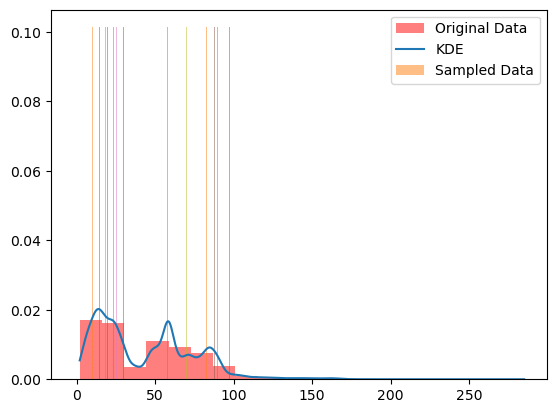

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 生成一些示例数据
np.random.seed(0)
# data = np.concatenate([np.random.randn(1000) - 2, np.random.randn(1000) + 2])
data = wna_data.iloc[:,2:].sum(axis=1).values

# 进行核密度估计
kde = gaussian_kde(data)

# 绘制原始数据的直方图
plt.hist(data, bins=20, density=True, color='r', alpha=0.5, label='Original Data')

# 绘制估计的概率密度函数
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, kde.evaluate(x), label='KDE')

# 从估计的概率密度函数中采样
sampled_data = kde.resample(1000)  # 200是想要采样的数据点数量
plt.hist(sampled_data, bins=20, density=True ,alpha=0.5, label='Sampled Data')

plt.legend()
plt.show()

## 1. sparse PCA


In [88]:
kmeans = KMeans(n_clusters=1000, random_state=0)
kmeans.fit(wna_data.iloc[:,2:])
sampled_data = []

for i in range(1000):
    indices = np.where(kmeans.labels_ == i)[0]
    sampled_index = np.random.choice(indices)
    sampled_data.append(wna_data.iloc[sampled_index,2:])

sampled_data = np.array(sampled_data)

/Users/houce/anaconda3/envs/torch_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [87]:
pca = PCA(n_components=90)
pca_result = pca.fit_transform(wna_data.iloc[:,2:].T)

cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

cumulative variance explained: 100.00%


In [79]:
data = np.array(wna_data.iloc[:,2:])

In [130]:
from scipy.stats import ttest_ind
# 计算均值并进行T检验
mean_X = np.mean(data, axis=0)
mean_X_sampled = np.mean(sampled_data, axis=0)
t, p = ttest_ind(data.astype(float), sampled_data.astype(float))

# 输出检验结果
# print(f"Mean of original data: {mean_X}")
# print(f"Mean of sampled data: {mean_X_sampled}")
print(f"T-value: {t}")
print(f"P-value: {p}")

T-value: [  6.80660415   2.82346277   0.51867074   5.92523474   8.04696769
   4.81080159   6.60862639   5.30663744   6.40254968  -0.63745929
   6.85645285   3.85059929   7.01592773  -5.4895013   -2.39380914
  -1.90870019  -6.37505645  -3.75062534  -4.24168379  -4.68881259
  -4.7214847   -4.88611568  -4.62169304  -4.09422252  -3.66439751
  -4.97298229  -7.80151155 -10.17278275  -8.96643053 -11.91190699
 -10.23577782 -10.93260476  -4.43380449  -4.46941755  -9.98805632
 -10.22671202 -11.10565429 -11.35182379 -11.04393049  -9.8031571
  -9.93951226 -14.90005378 -14.22355654 -13.39610409 -13.076605
 -14.27739891 -14.80303823 -14.19212282 -15.78456795 -12.06226177
  -8.88117211 -14.8399112  -14.88197376  -4.50823151  -3.54103203
  -4.38570752  -4.09191353  -3.9089359   -3.7698625   -3.83256769
  -3.12926415  -3.69247285  -3.5452235   -3.86911374  -3.55653824
  -1.4738775   -3.52061796  -3.04873362   9.66092533  -2.74659595
  -3.57162137  -8.05186011 -10.15317094  -8.11961105  -6.80557721
  -9

In [101]:
from scipy.stats import pearsonr
data = np.array(wna_data.iloc[:,2:])

def corr_cal(data, sampled_data):
    corr_matrix = np.corrcoef(data.T)
    corr_matrix_sampled = np.corrcoef(sampled_data.astype(float).T)
    corr_coef = pearsonr(corr_matrix.flatten(), corr_matrix_sampled.flatten())[0]
    return corr_coef

# 输出相关系数
print(f"Pearson correlation coefficient: {corr_cal(data, sampled_data)}")

Pearson correlation coefficient: 0.836370557080349


In [129]:
random_sampled_idx = np.random.choice(data.shape[0], size=1000, replace=False)
print(f"Pearson correlation coefficient: {corr_cal(data, data[random_sampled_idx])}")
t, p = ttest_ind(data, data[random_sampled_idx])

# 输出检验结果
# print(f"Mean of original data: {mean_X}")
# print(f"Mean of sampled data: {mean_X_sampled}")
# print(f"T-value: {t}")
# print(f"P-value: {p}")

Pearson correlation coefficient: 0.9983818660382677
T-value: [-0.05826086 -0.29563064 -0.23937611 -0.21101781 -0.36660978 -0.24882214
 -0.65594607 -0.82839199 -0.19822549 -1.13942327 -1.1317512  -0.07487845
 -0.98382585  1.06571857  0.66163601  1.03459619  0.55173942  1.3706246
  0.55420615  0.78471186  0.85745108  0.9889169   0.59498787  0.82911798
  0.94340662  0.70021342 -1.14731171 -1.12736228 -0.88737731 -1.29704323
 -1.53424325 -0.93371117 -1.75259061 -1.2392739  -0.93920436 -0.52548108
 -1.00904403 -0.67494242 -0.41840264 -1.22196762 -0.59817956 -0.52918792
 -0.34038071  0.04808328 -0.17242442 -0.07083761 -0.05917865 -0.47442882
 -0.26147179 -0.37638362  0.27984751 -0.09362122 -0.24236093  0.05764778
  0.58265606  0.48902941 -0.03312845  0.45781657 -0.01097433  0.37154058
  0.41979629  0.66624957  0.19185777  0.25439863  0.38951359 -0.4042558
 -0.49180608 -0.81687859 -0.49922761 -0.69667061 -0.12316299  0.25518259
 -0.06960053 -0.05933495  0.18353696  0.77969111  0.30761437  0.3

In [65]:
pca = PCA(n_components=90)
pca_result2 = pca.fit_transform(sampled_data)

cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

cumulative variance explained: 100.00%


In [140]:
# random projection
# transformer = random_projection.GaussianRandomProjection(n_components=1000)
# wna_data_projected = transformer.fit_transform(wna_data.iloc[:,2:].T)
# print(wna_data_projected.shape) 

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.T)

cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

pca_region = pd.concat([region,pd.DataFrame(pca_result,columns=['pc1','pc2'])],axis=1)
sns.scatterplot(data=pca_region, x="pc1", y="pc2", hue="region1")
plt.xlabel(f"PC1 {pca.explained_variance_ratio_[0]:.02%}")
plt.ylabel(f"PC2 {pca.explained_variance_ratio_[1]:.02%}")
plt.title('PCA - original data')

NameError: name 'PCA' is not defined

cumulative variance explained: 51.11%


Text(0.5, 1.0, 'PCA - sampled data')

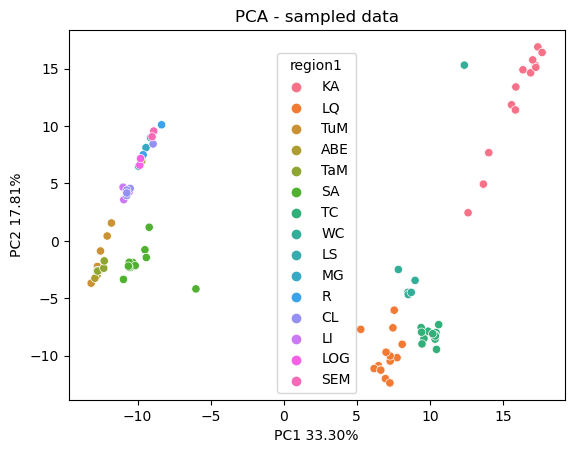

In [149]:
pca = PCA(n_components=2)
# pca_result = pca.fit_transform(data[random_sampled_idx].T)
pca_result = pca.fit_transform(sampled_data.T)

cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

pca_region = pd.concat([region,pd.DataFrame(pca_result,columns=['pc1','pc2'])],axis=1)
sns.scatterplot(data=pca_region, x="pc1", y="pc2", hue="region1")
plt.xlabel(f"PC1 {pca.explained_variance_ratio_[0]:.02%}")
plt.ylabel(f"PC2 {pca.explained_variance_ratio_[1]:.02%}")
plt.title('PCA - sampled data')

## 2. importance sampling